### IMPORTS

In [1]:
# manipulate data
import numpy as np
import pandas as pd

# visualize data
import matplotlib.pyplot as plt
import seaborn as sn

# model preparation
from sklearn.model_selection import (train_test_split, learning_curve,
                                     LearningCurveDisplay, validation_curve,
                                     ValidationCurveDisplay)
from sklearn.preprocessing import StandardScaler

# machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# model evaluation
from sklearn.metrics import (balanced_accuracy_score, 
                             accuracy_score, make_scorer,
                             recall_score, log_loss)

np.random.seed(123)

### Load and Preprocess: Cardiovascular Disease

In [2]:
file1 = "cardio_data_processed.csv"
cardio_vasc = pd.read_csv(file1)

In [3]:
# id: just an index
# useing age_years over age
# using weight and height instead of bmi
# using ap_hi/lo instead of bp_category and bp_category_encoded
cardio_cols_drop = ['id', 'age', 'bmi', 'bp_category',
                    'bp_category_encoded', "alco", "smoke",
                    'gender', 'gluc', 'active', 'cholesterol']
cardio_vasc = cardio_vasc.drop(columns=cardio_cols_drop, axis=1)

In [4]:
cardio_vasc = cardio_vasc.sample(frac=0.15)

In [5]:
cardio_vasc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10231 entries, 12148 to 67751
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   height     10231 non-null  int64  
 1   weight     10231 non-null  float64
 2   ap_hi      10231 non-null  int64  
 3   ap_lo      10231 non-null  int64  
 4   cardio     10231 non-null  int64  
 5   age_years  10231 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 559.5 KB


In [6]:
cardio_vasc.head(3)

,height,weight,ap_hi,ap_lo,cardio,age_years
12148,173,70.0,110,70,0,43
5541,168,75.0,120,80,1,51
40053,158,85.0,140,80,1,64


In [7]:
cardio_vasc['cardio'].value_counts() / len(cardio_vasc['cardio'])

cardio
0    0.510898
1    0.489102
Name: count, dtype: float64

In [8]:
# split data
cd_train, cd_test = train_test_split(cardio_vasc, test_size=.15,
                                     random_state=123, stratify=cardio_vasc['cardio'])

# get X, y
target_col = "cardio"
cols_drop = ["cardio"]
X_train_cd = cd_train.drop(cols_drop, axis=1)
X_test_cd = cd_test.drop(cols_drop, axis=1)
y_train_cd = cd_train[target_col]
y_test_cd = cd_test[target_col]

scale = StandardScaler()
scale.fit(X_train_cd)
X_train_scaled_cd = pd.DataFrame(data=scale.transform(X_train_cd),
                                 columns=X_train_cd.columns,
                                 index=X_train_cd.index)
X_test_scaled_cd = pd.DataFrame(data=scale.transform(X_test_cd),
                                columns=X_test_cd.columns,
                                index=X_test_cd.index)

### Baseline: Cardiovascular Disease

In [9]:
# calculat a baseline
act_pred_error_cd = pd.DataFrame({"actual": y_train_cd})
act_pred_error_cd["baseline_prediction"] = y_train_cd.value_counts().index[0]

baseline_acc_cd = accuracy_score(act_pred_error_cd["actual"], act_pred_error_cd["baseline_prediction"])

# print baseline accuracy
print(f"Baseline Accuracy Score: {round(baseline_acc_cd, 2)}%")

Baseline Accuracy Score: 0.51%


### Run Model: Cardiovascular Disease
#### Learning/Validation Curve: Cardiovascular Disease

Working on: decision_tree
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9])


Fitting VC: Hyper 1 (min_samples_split, [2, 4, 6, 8, 10])
Fitting VC: Hyper 2 (max_depth, [5, 10, 15, 20])

Working on: knn
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9])
Fitting VC: Hyper 1 (n_neighbors, [3, 5, 7, 9])
Fitting VC: Hyper 2 (p, [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0])

Working on: gradient_boosting
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9])
Fitting VC: Hyper 1 (n_estimators, [50, 100, 150, 200])
Fitting VC: Hyper 2 (subsample, [0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

Working on: support_vector_machine
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9])
Fitting VC: Hyper 1 (C, [0.5, 0.75, 1.0, 1.5, 2.0])
Fitting VC: Hyper 2 (gamma, [1.00000000e-06 1.77827941e-05 3.16227766e-04 5.62341325e-03
 1.00000000e-01])

Working on: mlp
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9])
Fitting VC: Hyper 1 (batch_size, [50, 55, 60, 65, 70])
Fitting VC: Hyper 2 (hidden_layer_sizes, [50, 75, 100, 125, 150])

Fitting mlp VC (Iters VS Error): (max_iter, [100, 125, 150, 175, 200, 225, 250, 275, 300])

/home/leonardo_leads/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonardo_leads/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonardo_leads/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Working on: decision_tree
LC (decision_tree)
VC: Hyper 1 (min_samples_split)
VC: Hyper 2 (max_depth)


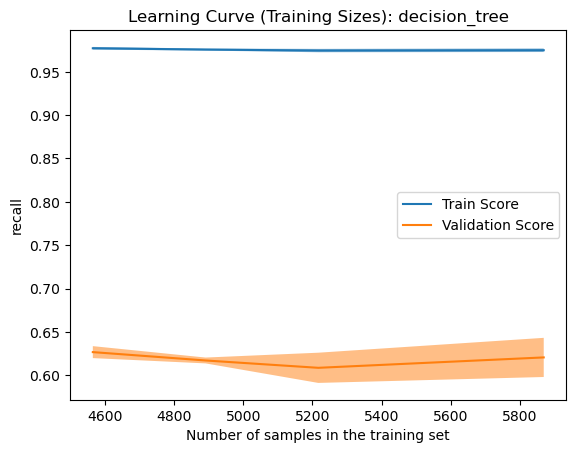

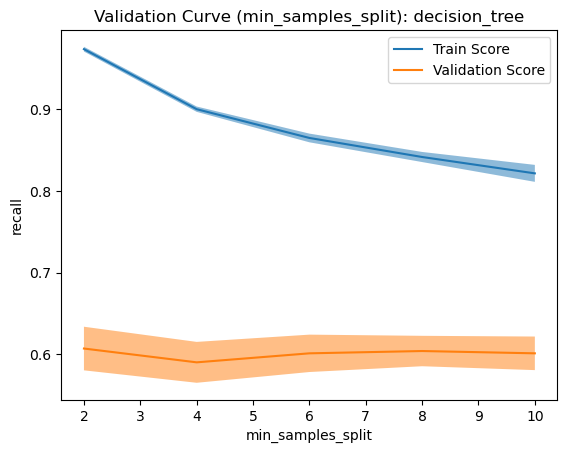

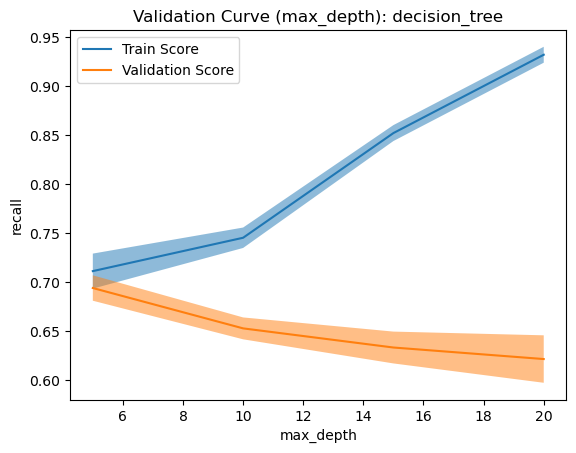

Working on: knn
LC (knn)
VC: Hyper 1 (n_neighbors)
VC: Hyper 2 (p)


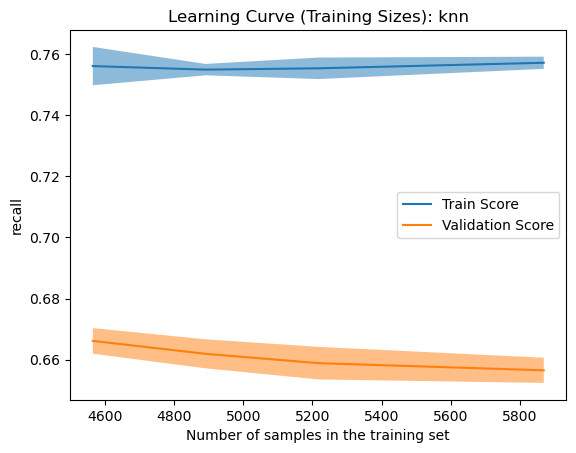

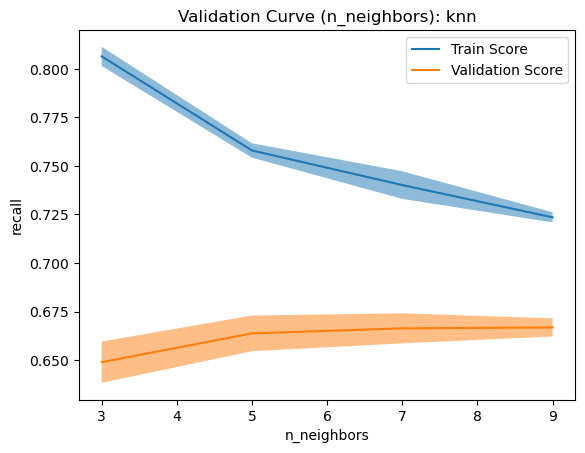

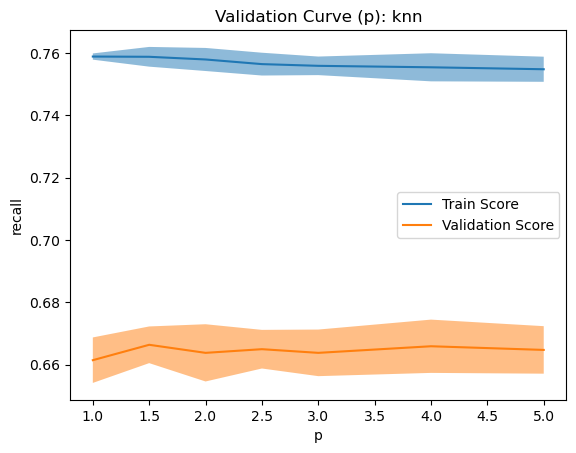

Working on: gradient_boosting
LC (gradient_boosting)
VC: Hyper 1 (n_estimators)
VC: Hyper 2 (subsample)


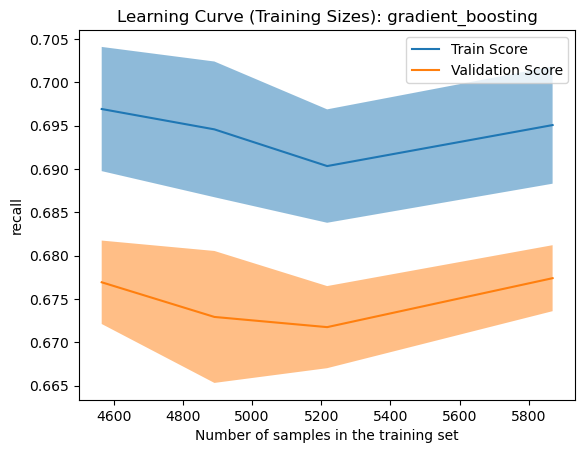

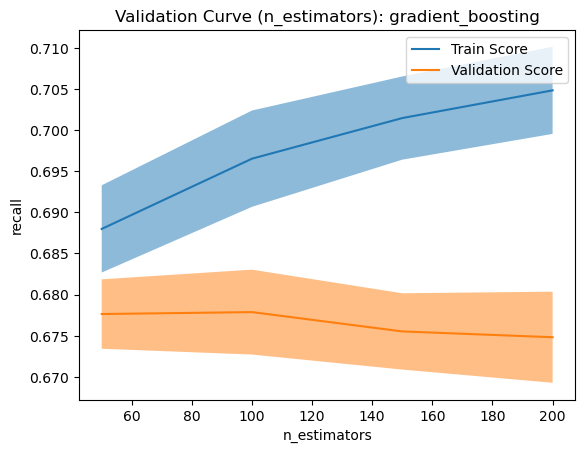

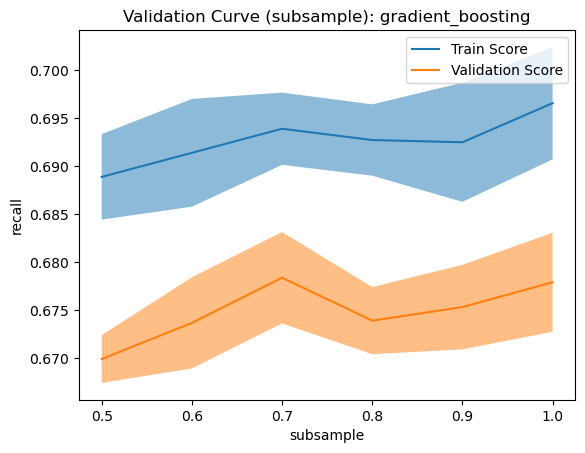

Working on: support_vector_machine
LC (support_vector_machine)
VC: Hyper 1 (C)
VC: Hyper 2 (gamma)


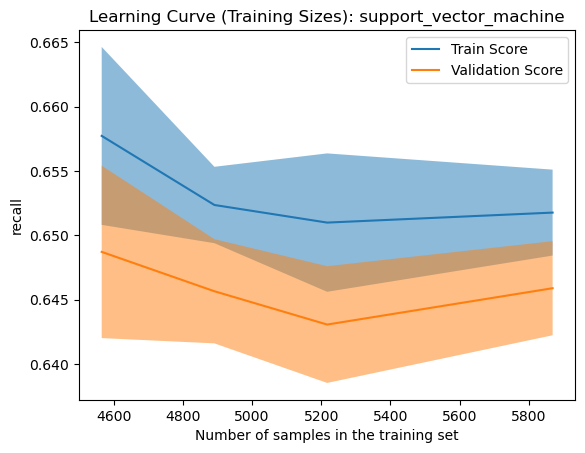

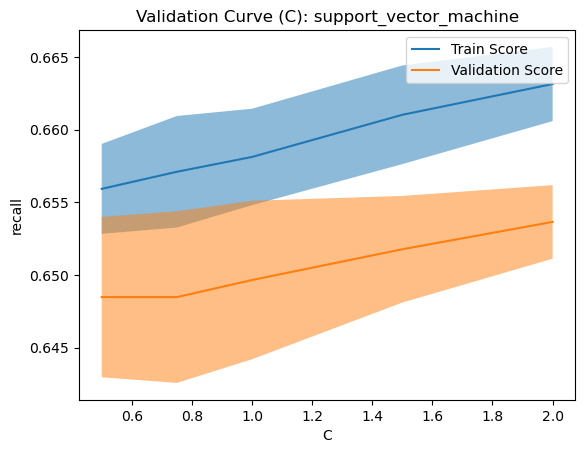

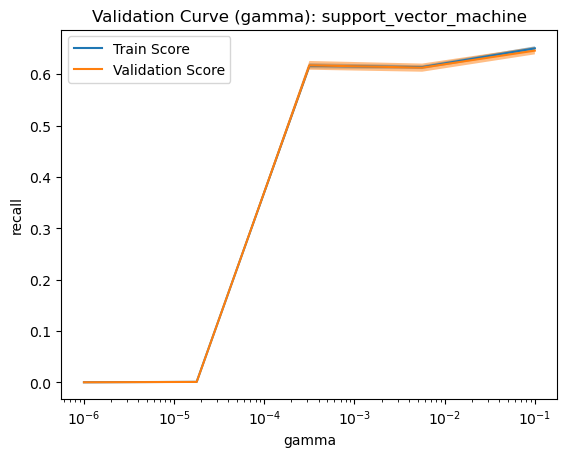

Working on: mlp
LC (mlp)
VC: Hyper 1 (batch_size)
VC: Hyper 2 (hidden_layer_sizes)
VC: (max_iter VS Log Loss)


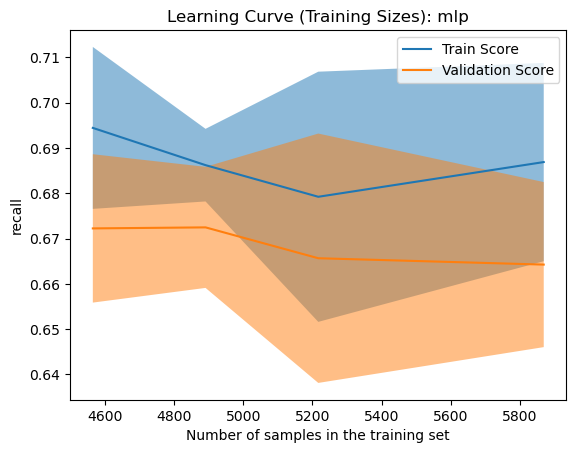

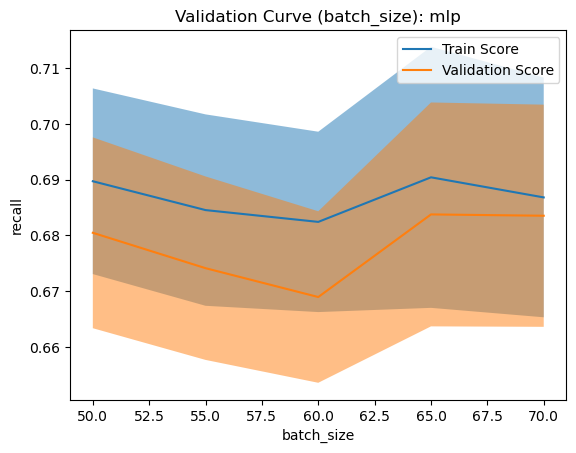

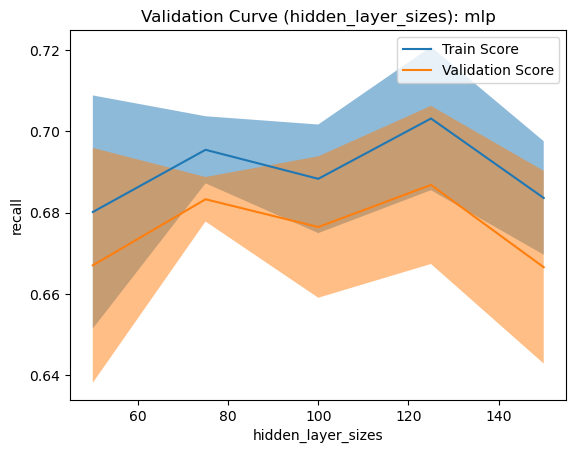

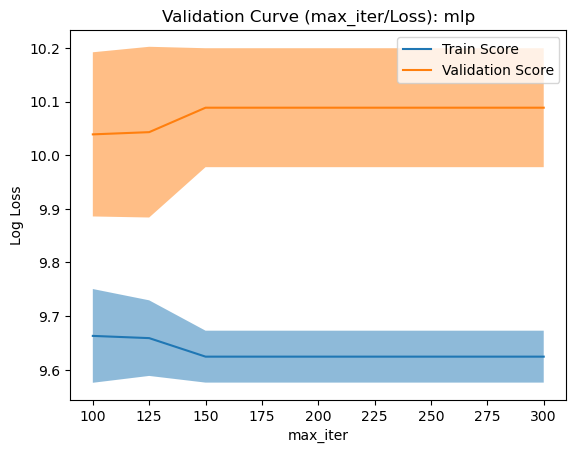

In [10]:
np.random.seed(123)

# create dictionary for each model
class_modelsCD = {'decision_tree':{'model': DecisionTreeClassifier(random_state=123)},
                  'knn':{'model': KNeighborsClassifier(n_jobs=-1)},
                  'gradient_boosting':{'model': GradientBoostingClassifier(random_state=123)},
                  'support_vector_machine': {'model': SVC(random_state=123,
                                                          kernel='rbf')},
                  'mlp':{'model': MLPClassifier(random_state=123,
                                                learning_rate_init=0.01)}}

cd_params = {'decision_tree': {'param1_name': 'min_samples_split', 
                               'param1_range':  [2, 4, 6, 8, 10],
                               'param2_name':'max_depth',
                               'param2_range': [5, 10, 15, 20]},
             'knn': {'param1_name': 'n_neighbors',
                     'param1_range': [3, 5, 7, 9],
                     'param2_name': 'p',
                     'param2_range': [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0]},
             'gradient_boosting': {'param1_name': 'n_estimators',
                                   'param1_range': [50, 100, 150, 200],
                                   'param2_name': 'subsample',
                                   'param2_range': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             'support_vector_machine': {'param1_name': 'C',
                                        'param1_range': [0.5, 0.75, 1.0, 1.5, 2.0],
                                        'param2_name': 'gamma',
                                        'param2_range': np.logspace(-6, -1, 5)},
             'mlp': {'param1_name': 'batch_size',
                     'param1_range': [50, 55, 60, 65, 70],
                     'param2_name': 'hidden_layer_sizes',
                     'param2_range': [50, 75, 100, 125, 150]}}

sizes = [0.7, 0.75, 0.80, 0.90]

for model_name in class_modelsCD.keys():
    print(f'Working on: {model_name}')
    
    estimator = class_modelsCD[model_name]['model']

    VCparam_name1cd = cd_params[model_name]['param1_name']
    VCparam_range1cd = cd_params[model_name]['param1_range']
    VCparam_name2cd = cd_params[model_name]['param2_name']
    VCparam_range2cd = cd_params[model_name]['param2_range']

    # learning curve
    print(f'Fitting LC: Train Sizes ({sizes})')
    fittedLCcd = learning_curve(estimator=estimator,
                                  X=X_train_scaled_cd,
                                  y=y_train_cd,
                                  train_sizes=sizes,
                                  cv=4,
                                  scoring='recall',
                                  n_jobs=-1,
                                  random_state=123,
                                  return_times=True)

    # validation curves
    print(f'Fitting VC: Hyper 1 ({VCparam_name1cd}, {VCparam_range1cd})')
    fittedVC_param1cd = validation_curve(estimator=estimator,
                                       X=X_train_scaled_cd,
                                       y=y_train_cd,
                                       param_name=VCparam_name1cd,
                                       param_range=VCparam_range1cd,
                                       cv=4,
                                       scoring='recall',
                                       n_jobs=-1,)

    print(f'Fitting VC: Hyper 2 ({VCparam_name2cd}, {VCparam_range2cd})\n')
    fittedVC_param2cd = validation_curve(estimator=estimator,
                                       X=X_train_scaled_cd,
                                       y=y_train_cd,
                                       param_name=VCparam_name2cd,
                                       param_range=VCparam_range2cd,
                                       cv=4,
                                       scoring='recall',
                                       n_jobs=-1,)

    if model_name == 'mlp':
        iters = 'max_iter'
        iter_range = [100, 125, 150, 175, 200, 225, 250, 275, 300]
        scorer = make_scorer(score_func=log_loss, 
                             response_method='predict')
        
        print(f'Fitting {model_name} VC (Iters VS Error): ({iters}, {iter_range})\n')
        fittedVC_llcd = validation_curve(estimator=estimator,
                                       X=X_train_scaled_cd,
                                       y=y_train_cd,
                                       param_name=iters,
                                       param_range=iter_range,
                                       cv=4,
                                       scoring=scorer,
                                       n_jobs=-1)

        VCtrain_scoresllcd, VCtest_scoresllcd = fittedVC_llcd
        class_modelsCD[model_name]['VCtrain_scoresllcd'] = VCtrain_scoresllcd
        class_modelsCD[model_name]['VCtest_scoresllcd'] = VCtest_scoresllcd
    
    LCtrain_sizescd, LCtrain_scorescd, LCtest_scorescd, fit_times, score_times = fittedLCcd
    VCtrain_scores1cd, VCtest_scores1cd = fittedVC_param1cd
    VCtrain_scores2cd, VCtest_scores2cd = fittedVC_param2cd
    
    # learning curve to dict
    class_modelsCD[model_name]['LCtrain_sizescd'] = LCtrain_sizescd
    class_modelsCD[model_name]['LCtrain_scorescd'] = LCtrain_scorescd
    class_modelsCD[model_name]['LCtest_scorescd'] = LCtest_scorescd

    # param1 vc to dict
    class_modelsCD[model_name]['VCtrain_scores1cd'] = VCtrain_scores1cd
    class_modelsCD[model_name]['VCtest_scores1cd'] = VCtest_scores1cd

    # param2 vc to dict
    class_modelsCD[model_name]['VCtrain_scores2cd'] = VCtrain_scores2cd
    class_modelsCD[model_name]['VCtest_scores2cd'] = VCtest_scores2cd

for model_name in class_modelsCD.keys():
    print(f'Working on: {model_name}')

    LCtrain_sizes = class_modelsCD[model_name]['LCtrain_sizescd']
    LCtrain_scores = class_modelsCD[model_name]['LCtrain_scorescd']
    LCtest_scores = class_modelsCD[model_name]['LCtest_scorescd']

    VCtrain_scores1 = class_modelsCD[model_name]['VCtrain_scores1cd']
    VCtest_scores1 = class_modelsCD[model_name]['VCtest_scores1cd']

    VCtrain_scores2 = class_modelsCD[model_name]['VCtrain_scores2cd']
    VCtest_scores2 = class_modelsCD[model_name]['VCtest_scores2cd']

    param1_name = cd_params[model_name]['param1_name']
    param1_range = cd_params[model_name]['param1_range']

    param2_name = cd_params[model_name]['param2_name']
    param2_range = cd_params[model_name]['param2_range']    

    LCdisplay = LearningCurveDisplay(train_sizes=LCtrain_sizes,
                                   train_scores=LCtrain_scores,
                                   test_scores=LCtest_scores,
                                   score_name="recall")

    VCdisplay1 = ValidationCurveDisplay(param_name=param1_name,
                                        param_range=param1_range,
                                        train_scores=VCtrain_scores1,
                                        test_scores=VCtest_scores1,
                                        score_name="recall")

    VCdisplay2 = ValidationCurveDisplay(param_name=param2_name,
                                        param_range=param2_range,
                                        train_scores=VCtrain_scores2,
                                        test_scores=VCtest_scores2,
                                        score_name="recall")
    
    save_loc = f"./plots/cvd/{model_name}/"

    print(f'LC ({model_name})')
    LCdisplay.plot()
    plt.title(label=f"Learning Curve (Training Sizes): {model_name}")
    plt.legend(['Train Score', 'Validation Score'])
    plt.savefig(fname=f"{save_loc}training_sizes.png")
    
    print(f'VC: Hyper 1 ({param1_name})')
    VCdisplay1.plot()
    plt.title(label=f"Validation Curve ({param1_name}): {model_name}")
    plt.legend(['Train Score', 'Validation Score'])
    plt.savefig(fname=f"{save_loc}{param1_name}.png")
    
    print(f'VC: Hyper 2 ({param2_name})')
    VCdisplay2.plot()
    plt.title(label=f"Validation Curve ({param2_name}): {model_name}")
    plt.legend(['Train Score', 'Validation Score'])
    plt.savefig(fname=f"{save_loc}{param2_name}.png")

    if model_name == 'mlp':
        VCtrain_scoresll = class_modelsCD[model_name]['VCtrain_scoresllcd']
        VCtest_scoresll = class_modelsCD[model_name]['VCtest_scoresllcd']
        
        VCdisplayll = ValidationCurveDisplay(param_name=iters,
                                        param_range=iter_range,
                                        train_scores=VCtrain_scoresll,
                                        test_scores=VCtest_scoresll,
                                        score_name="Log Loss")

        print(f'VC: ({iters} VS Log Loss)')
        VCdisplayll.plot()
        plt.title(label=f"Validation Curve ({iters}/Loss): {model_name}")
        plt.legend(['Train Score', 'Validation Score'])
        plt.savefig(fname=f"{save_loc}{iters}.png")
    
    plt.show()

### Load and Preprocess: Nutrition Facts

In [11]:
file2 = "MyFoodData_Nutrition_Facts_SpreadSheet_Release_1.4.xlsx"
nutrition_facts = pd.read_excel(file2)

In [12]:
nutrition_facts = nutrition_facts.dropna(axis=0, subset=["Food Group"])

# dropping columns that have every value missing
cols_drop = ["Added Sugar g", "Soluble Fiber g", "Insoluble Fiber g",
             "Total sugar alcohols g", "Molybdenum mcg", "Chlorine mg",
             "Biotin B7 mcg", "NetCarbs g"]
nutrition_facts = nutrition_facts.drop(columns=cols_drop, axis=1)

# dropping cols that don't seem to mean much
more_drop = ["PRAL score", "ID", "Name", '183 n3 ccc ALA mg',
             '205 n3 EPA mg', '225 n3 DPA mg', '226 n3 DHA mg',
             "Serving Weight 1 g", "Serving Weight 2 g", "Serving Weight 3 g",
             "Serving Weight 4 g", "Serving Weight 5 g", "Serving Weight 6 g",
             "Serving Weight 7 g", "Serving Weight 8 g", "Serving Weight 9 g",
             "200 Calorie Weight g", "Saturated Fats g",
             "Fat g", "Fiber g", "Calcium mg", "Iron Fe mg", "Potassium K mg", "Magnesium mg",
             "Vitamin A RAE mcg", "Vitamin C mg", "Vitamin B12 mcg", "Vitamin D mcg",
             "Vitamin E AlphaTocopherol mg", "Omega 3s mg", "Omega 6s mg", "Phosphorus P mg",
             "Copper Cu mg", "Thiamin B1 mg", "Riboflavin B2 mg", "Vitamin B6 mg", "Folate B9 mcg",
             "Folic acid mcg", "Food Folate mcg", "Folate DFE mcg", "Choline mg", "Retinol mcg",
             "Carotene beta mcg", "Carotene alpha mcg", "Lycopene mcg", "Lutein + Zeaxanthin mcg",
             "Vitamin K mcg", "Fatty acids total monounsaturated mg", "Fatty acids total polyunsaturated mg",
             "Alcohol g", "Caffeine mg", "Theobromine mg", "Sugars g", "Niacin B3 mg",
             "Selenium Se mcg", "Zinc Zn mg", "Calories"]
nutrition_facts = nutrition_facts.drop(columns=more_drop, axis=1)

# drop column if 70% of its rows are empty
threshold = int(.70*len(nutrition_facts))
nutrition_facts.dropna(axis=1, thresh=threshold, inplace=True)

nutrition_facts.fillna(0, inplace=True)

nutrition_facts.columns = nutrition_facts.columns.str.lower()

cols_rename = {"food group": "food_group", "protein g": "protein", "carbohydrate g": "carbohydrate",
                "cholesterol mg": "cholesterol", "water g": "water", "sodium mg": "sodium"}

nutrition_facts = nutrition_facts.rename(mapper=cols_rename, axis=1)

In [ ]:
nutrition_facts['food_group'].value_counts() / len(nutrition_facts)

In [14]:
bool_mask1 = (nutrition_facts['food_group'] == 'Meats') | (nutrition_facts['food_group'] == 'Vegetables') 
bool_mask2 = bool_mask1 | (nutrition_facts['food_group'] == 'Baked Foods')
bool_mask3 = bool_mask2 | (nutrition_facts['food_group'] == 'Fish')
nutrition_facts = nutrition_facts[bool_mask3]

In [ ]:
nutrition_facts['food_group'].value_counts() / len(nutrition_facts)

In [ ]:
nutrition_facts.info()

In [17]:
# split data
nf_train, nf_test = train_test_split(nutrition_facts,
                                     test_size=.15,
                                     random_state=123,
                                     stratify=nutrition_facts['food_group'])

# get X, y
target_col = "food_group"
cols_drop = ["food_group"]
X_train_nf = nf_train.drop(cols_drop, axis=1)
X_test_nf = nf_test.drop(cols_drop, axis=1)
y_train_nf = nf_train[target_col]
y_test_nf = nf_test[target_col]

# scale data
scale = StandardScaler()
scale.fit(X_train_nf)
X_train_scaled_nf = pd.DataFrame(data=scale.transform(X_train_nf),
                                 columns=X_train_nf.columns,
                                 index=X_train_nf.index)
X_test_scaled_nf = pd.DataFrame(data=scale.transform(X_test_nf),
                                columns=X_test_nf.columns,
                                index=X_test_nf.index)

### Baseline: Nutrition Facts

In [ ]:
# calculat a baseline
act_pred_error_nf = pd.DataFrame({"actual": y_train_nf})
act_pred_error_nf["baseline_prediction"] = y_train_nf.value_counts().index[0]

baseline_acc_nf = accuracy_score(act_pred_error_nf["actual"], act_pred_error_nf["baseline_prediction"])

# print baseline accuracy
print(f"Baseline Accuracy Score: {round(baseline_acc_nf, 2)}%")

### Run Model: Nutrition Facts

#### Learning/Validation Curve: Nutrition Facts

Working on: decision_tree
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9]


Fitting VC: Hyper 1 (min_samples_split, [2, 4, 6, 8, 10])
Fitting VC: Hyper 2 (max_depth, [5, 10, 15, 20])

Working on: knn
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9]
Fitting VC: Hyper 1 (n_neighbors, [3, 5, 7, 9])
Fitting VC: Hyper 2 (p, [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0])

Working on: gradient_boosting
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9]
Fitting VC: Hyper 1 (n_estimators, [50, 100, 150, 200])
Fitting VC: Hyper 2 (subsample, [0.5, 0.6, 0.75, 0.8, 0.9, 1.0])

Working on: support_vector_machine
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9]
Fitting VC: Hyper 1 (C, [0.5, 0.75, 1.0, 1.5, 2.0])
Fitting VC: Hyper 2 (gamma, [1.00000000e-06 1.77827941e-05 3.16227766e-04 5.62341325e-03
 1.00000000e-01])

Working on: mlp
Fitting LC: Train Sizes ([0.7, 0.75, 0.8, 0.9]
Fitting VC: Hyper 1 (batch_size, [25, 50, 75, 100, 125])
Fitting VC: Hyper 2 (hidden_layer_sizes, [125, 150, 175, 200, 225, 230])

Fitting mlp VC (Iters VS Error): (max_iter, [100, 125, 150, 175, 200, 225, 250, 275,

/home/leonardo_leads/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/leonardo_leads/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/leonardo_leads/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/leonardo_leads/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_tr

Working on: decision_tree
LC (decision_tree)
VC: Hyper 1 (min_samples_split)
VC: Hyper 2 (max_depth)



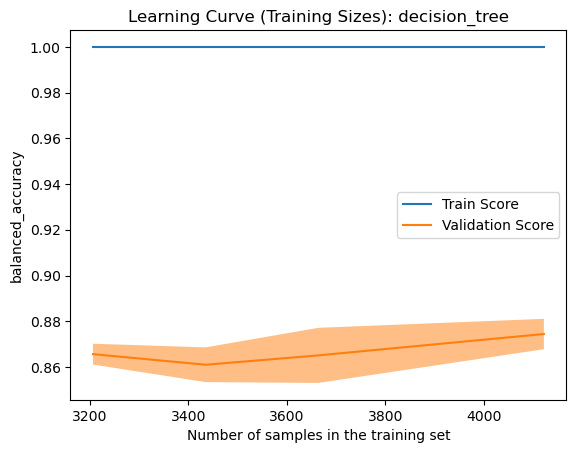

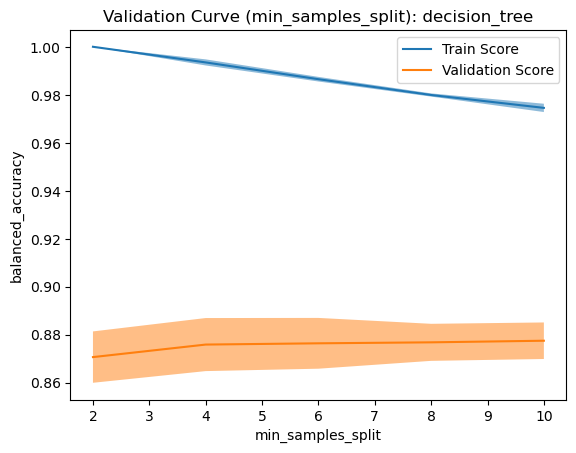

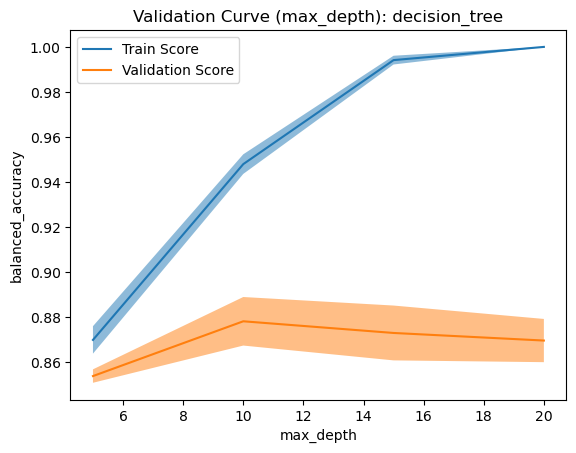

Working on: knn
LC (knn)
VC: Hyper 1 (n_neighbors)
VC: Hyper 2 (p)



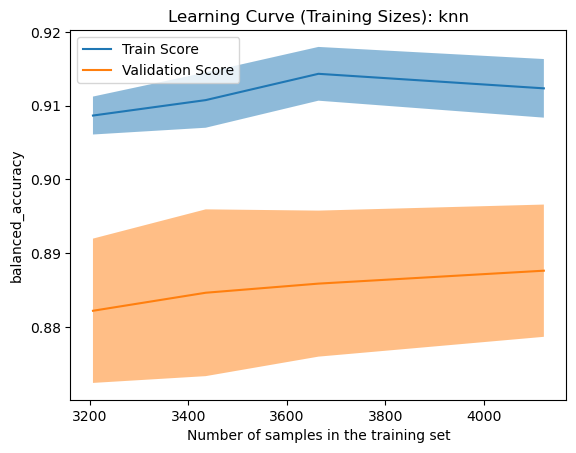

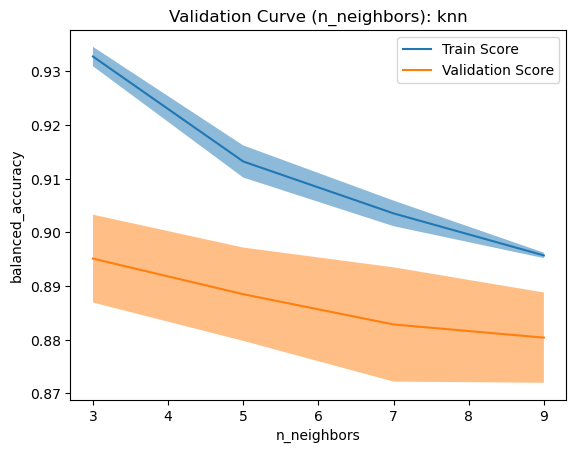

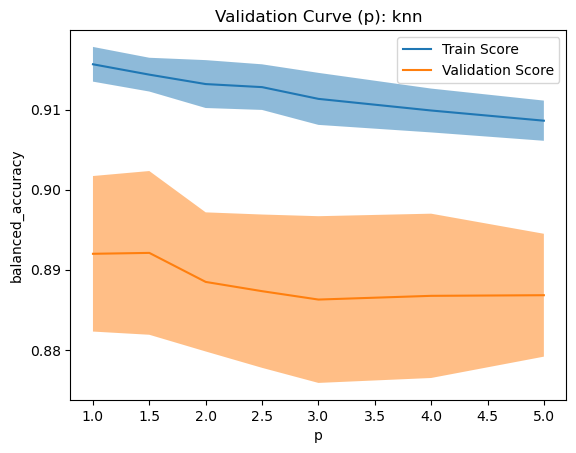

Working on: gradient_boosting
LC (gradient_boosting)
VC: Hyper 1 (n_estimators)
VC: Hyper 2 (subsample)



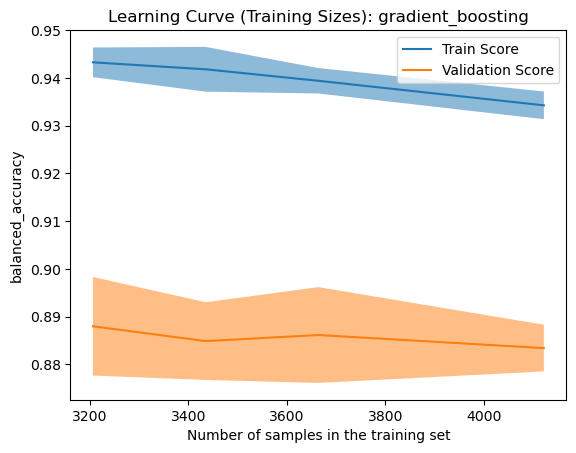

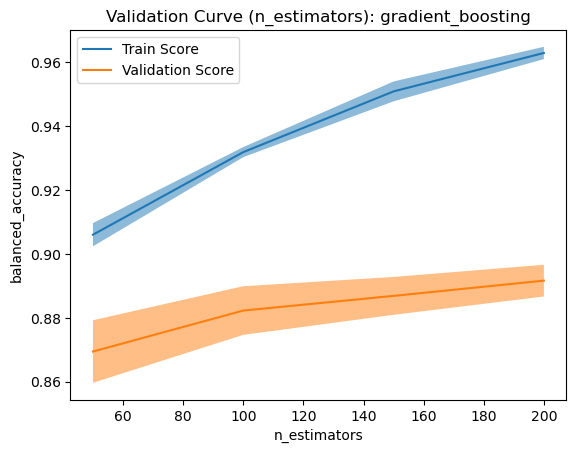

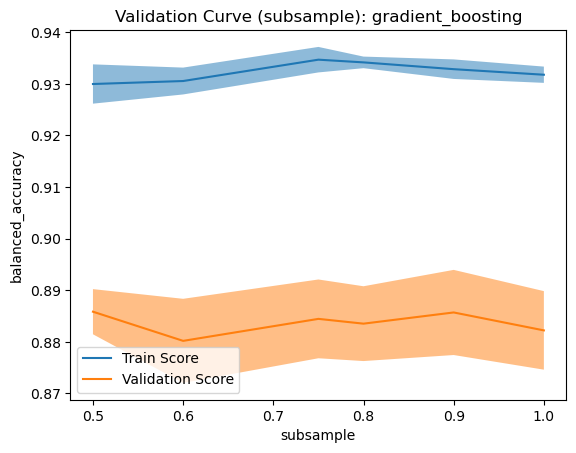

Working on: support_vector_machine
LC (support_vector_machine)
VC: Hyper 1 (C)
VC: Hyper 2 (gamma)



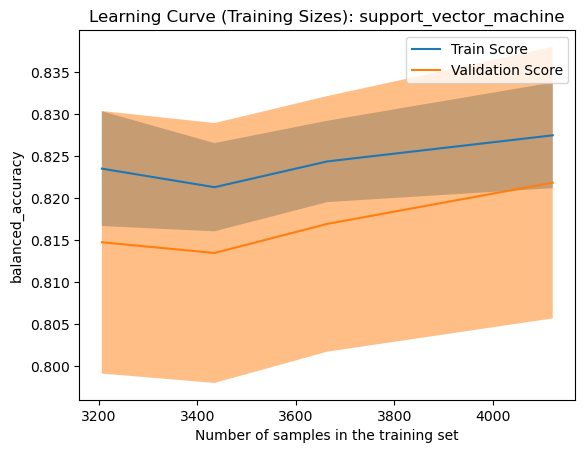

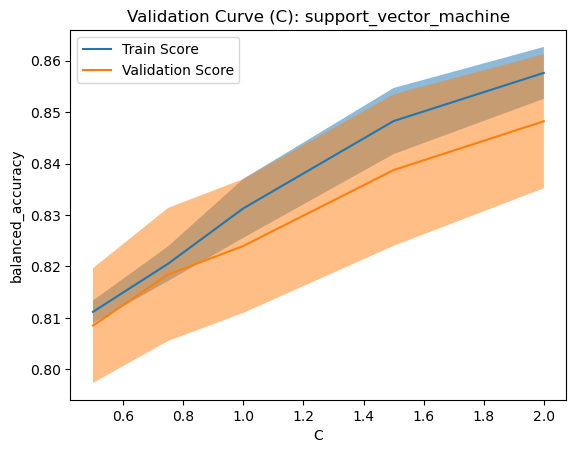

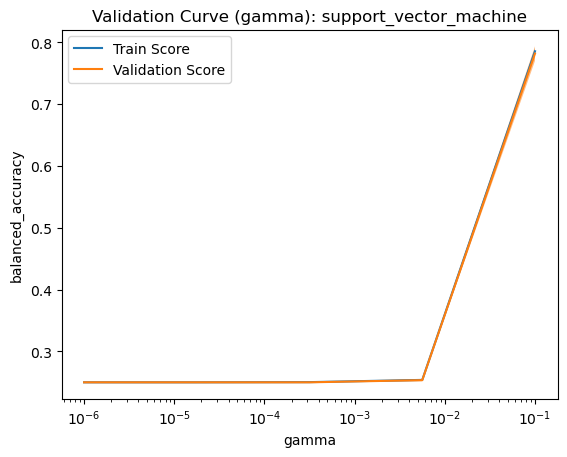

Working on: mlp
LC (mlp)
VC: Hyper 1 (batch_size)
VC: Hyper 2 (hidden_layer_sizes)

VC: (max_iter VS Log Loss)


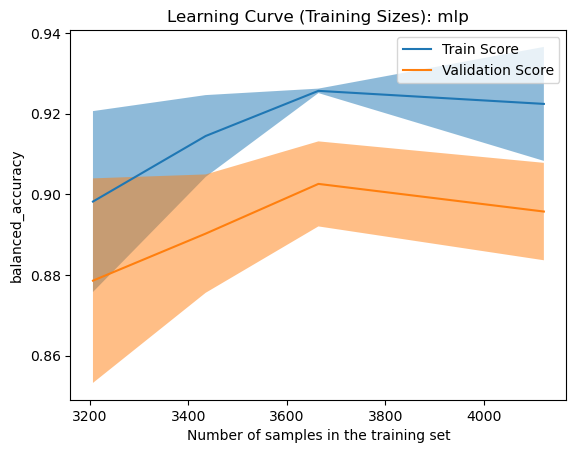

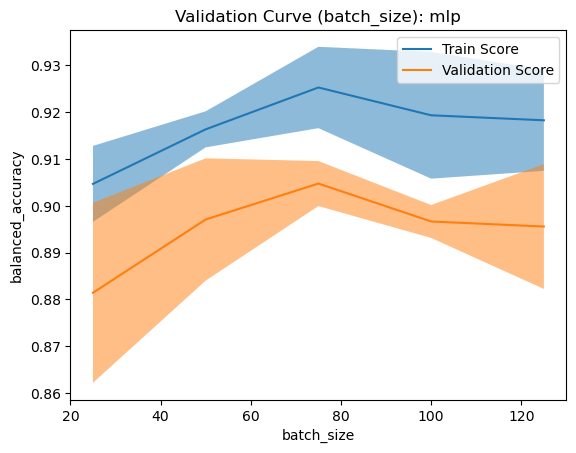

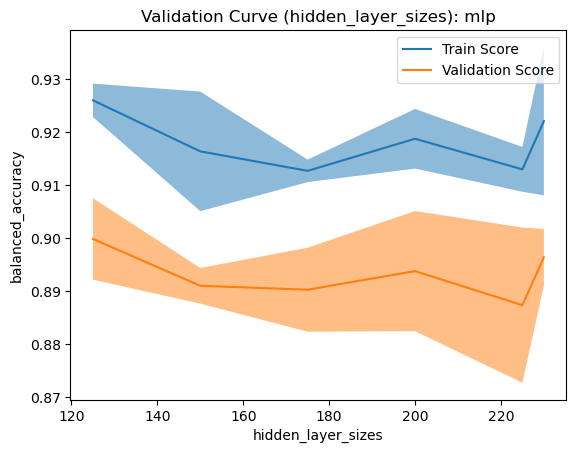

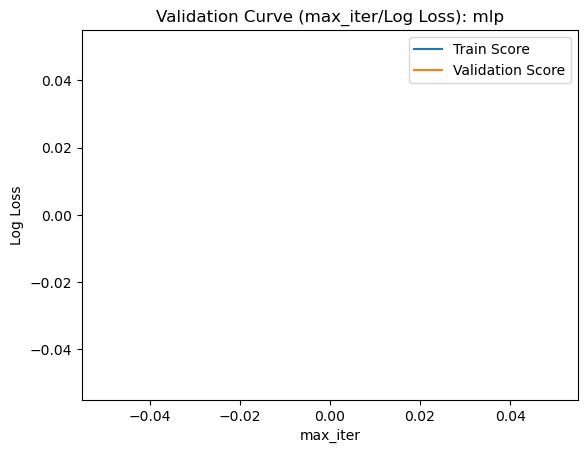

In [22]:
np.random.seed(123)

# create dictionary for each model
class_modelsNF = {'decision_tree':{'model': DecisionTreeClassifier(random_state=123,
                                                                   class_weight='balanced')},
                  'knn':{'model': KNeighborsClassifier(n_jobs=-1)},
                  'gradient_boosting':{'model': GradientBoostingClassifier(random_state=123)},
                  'support_vector_machine': {'model': SVC(random_state=123,
                                                          class_weight='balanced',
                                                          kernel='poly')},
                  'mlp':{'model': MLPClassifier(random_state=123,
                                                learning_rate_init=0.01,
                                                max_iter=300,
                                                solver='adam')}}

nf_params = {'decision_tree': {'param1_name': 'min_samples_split', 
                               'param1_range':  [2, 4, 6, 8, 10],
                               'param2_name':'max_depth',
                               'param2_range': [5, 10, 15, 20]},
             'knn': {'param1_name': 'n_neighbors',
                     'param1_range': [3, 5, 7, 9],
                     'param2_name': 'p',
                     'param2_range': [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0]},
             'gradient_boosting': {'param1_name': 'n_estimators',
                                   'param1_range': [50, 100, 150, 200],
                                   'param2_name': 'subsample',
                                   'param2_range': [0.5, 0.6, 0.75, 0.8, 0.9, 1.0]},
             'support_vector_machine': {'param1_name': 'C',
                                        'param1_range': [0.5, 0.75, 1.0, 1.5, 2.0],
                                        'param2_name': 'gamma',
                                        'param2_range': np.logspace(-6, -1, 5)},
             'mlp': {'param1_name': 'batch_size',
                     'param1_range': [25, 50, 75, 100, 125],
                     'param2_name': 'hidden_layer_sizes',
                     'param2_range': [125, 150, 175, 200, 225, 230]}}

sizes = [0.7, 0.75, 0.80, 0.90]

for model_name in class_modelsNF.keys():
    print(f'Working on: {model_name}')
    
    estimator = class_modelsNF[model_name]['model']

    VCparam_name1nf = nf_params[model_name]['param1_name']
    VCparam_range1nf = nf_params[model_name]['param1_range']
    VCparam_name2nf = nf_params[model_name]['param2_name']
    VCparam_range2nf = nf_params[model_name]['param2_range']

    # learning curve
    print(f'Fitting LC: Train Sizes ({sizes}')
    fittedLCnf = learning_curve(estimator=estimator,
                                  X=X_train_scaled_nf,
                                  y=y_train_nf,
                                  train_sizes=sizes,
                                  cv=4,
                                  scoring='balanced_accuracy',
                                  n_jobs=-1,
                                  random_state=123,
                                  return_times=True)

    # validation curves
    print(f'Fitting VC: Hyper 1 ({VCparam_name1nf}, {VCparam_range1nf})')
    fittedVC_param1nf = validation_curve(estimator=estimator,
                                       X=X_train_scaled_nf,
                                       y=y_train_nf,
                                       param_name=VCparam_name1nf,
                                       param_range=VCparam_range1nf,
                                       cv=4,
                                       scoring='balanced_accuracy',
                                       n_jobs=-1,)

    print(f'Fitting VC: Hyper 2 ({VCparam_name2nf}, {VCparam_range2nf})\n')
    fittedVC_param2nf = validation_curve(estimator=estimator,
                                       X=X_train_scaled_nf,
                                       y=y_train_nf,
                                       param_name=VCparam_name2nf,
                                       param_range=VCparam_range2nf,
                                       cv=4,
                                       scoring='balanced_accuracy',
                                       n_jobs=-1,)

    if model_name == 'mlp':
        iters = 'max_iter'
        iter_range = [100, 125, 150, 175, 200, 225, 250, 275, 300]
        scorer = make_scorer(score_func=log_loss, 
                             response_method='predict')
        
        print(f'Fitting {model_name} VC (Iters VS Error): ({iters}, {iter_range})\n')
        fittedVC_llnf = validation_curve(estimator=estimator,
                                       X=X_train_scaled_nf,
                                       y=y_train_nf,
                                       param_name=iters,
                                       param_range=iter_range,
                                       cv=4,
                                       scoring=scorer,
                                       n_jobs=-1,)

        VCtrain_scoresllnf, VCtest_scoresllnf = fittedVC_llnf
        class_modelsNF[model_name]['VCtrain_scoresllnf'] = VCtrain_scoresllnf
        class_modelsNF[model_name]['VCtest_scoresllnf'] = VCtest_scoresllnf
    
    LCtrain_sizesnf, LCtrain_scoresnf, LCtest_scoresnf, fit_times, score_times = fittedLCnf
    VCtrain_scores1nf, VCtest_scores1nf = fittedVC_param1nf
    VCtrain_scores2nf, VCtest_scores2nf = fittedVC_param2nf

    # learning curve to dict
    class_modelsNF[model_name]['LCtrain_sizesnf'] = LCtrain_sizesnf
    class_modelsNF[model_name]['LCtrain_scoresnf'] = LCtrain_scoresnf
    class_modelsNF[model_name]['LCtest_scoresnf'] = LCtest_scoresnf

    # param1 vc to dict
    class_modelsNF[model_name]['VCtrain_scores1nf'] = VCtrain_scores1nf
    class_modelsNF[model_name]['VCtest_scores1nf'] = VCtest_scores1nf

    # param2 vc to dict
    class_modelsNF[model_name]['VCtrain_scores2nf'] = VCtrain_scores2nf
    class_modelsNF[model_name]['VCtest_scores2nf'] = VCtest_scores2nf


for model_name in class_modelsNF.keys():
    print(f'Working on: {model_name}')

    LCtrain_sizes = class_modelsNF[model_name]['LCtrain_sizesnf']
    LCtrain_scores = class_modelsNF[model_name]['LCtrain_scoresnf']
    LCtest_scores = class_modelsNF[model_name]['LCtest_scoresnf']

    VCtrain_scores1 = class_modelsNF[model_name]['VCtrain_scores1nf']
    VCtest_scores1 = class_modelsNF[model_name]['VCtest_scores1nf']

    VCtrain_scores2 = class_modelsNF[model_name]['VCtrain_scores2nf']
    VCtest_scores2 = class_modelsNF[model_name]['VCtest_scores2nf']

    param1_name = nf_params[model_name]['param1_name']
    param1_range = nf_params[model_name]['param1_range']

    param2_name = nf_params[model_name]['param2_name']
    param2_range = nf_params[model_name]['param2_range']    

    LCdisplay = LearningCurveDisplay(train_sizes=LCtrain_sizes,
                                    train_scores=LCtrain_scores,
                                    test_scores=LCtest_scores,
                                    score_name="balanced_accuracy")

    VCdisplay1 = ValidationCurveDisplay(param_name=param1_name,
                                        param_range=param1_range,
                                        train_scores=VCtrain_scores1,
                                        test_scores=VCtest_scores1,
                                        score_name="balanced_accuracy")

    VCdisplay2 = ValidationCurveDisplay(param_name=param2_name,
                                        param_range=param2_range,
                                        train_scores=VCtrain_scores2,
                                        test_scores=VCtest_scores2,
                                        score_name="balanced_accuracy")

    save_loc = f"./plots/nf/{model_name}/"
    
    print(f'LC ({model_name})')
    LCdisplay.plot()
    plt.title(label=f"Learning Curve (Training Sizes): {model_name}")
    plt.legend(['Train Score', 'Validation Score'])
    plt.savefig(fname=f"{save_loc}training_sizes.png")

    print(f'VC: Hyper 1 ({param1_name})')    
    VCdisplay1.plot()
    plt.title(label=f"Validation Curve ({param1_name}): {model_name}")
    plt.legend(['Train Score', 'Validation Score'])
    plt.savefig(fname=f"{save_loc}{param1_name}.png")

    print(f'VC: Hyper 2 ({param2_name})\n')
    VCdisplay2.plot()
    plt.title(label=f"Validation Curve ({param2_name}): {model_name}")
    plt.legend(['Train Score', 'Validation Score'])
    plt.savefig(fname=f"{save_loc}{param2_name}.png")

    if model_name == 'mlp':
        VCtrain_scoresll = class_modelsNF[model_name]['VCtrain_scoresllnf']
        VCtest_scoresll = class_modelsNF[model_name]['VCtest_scoresllnf']
        
        VCdisplayll = ValidationCurveDisplay(param_name=iters,
                                        param_range=iter_range,
                                        train_scores=VCtrain_scoresll,
                                        test_scores=VCtest_scoresll,
                                        score_name="Log Loss")

        print(f'VC: ({iters} VS Log Loss)')
        VCdisplayll.plot()
        plt.title(label=f"Validation Curve ({iters}/Log Loss): {model_name}")
        plt.legend(['Train Score', 'Validation Score'])
        plt.savefig(fname=f"{save_loc}{iters}.png")

    plt.show()